In [1]:
import numpy as np
import pandas as pd
import requests
import datetime, time
import matplotlib.pyplot as plt
import random

In [2]:
#speed_route_df = pd.read_csv('./average_speed.csv')
speed_route_df = pd.DataFrame()
for hour in range(6,12):
    path = './speed_data_from_Google/Monday_{}_speed.csv'.format(hour)
    data = pd.read_csv(path)
    data = data[['RouteID','length', 'hour', 'minute', 'travel_time','average_speed']]
    speed_route_df = pd.concat([speed_route_df,data])

In [13]:
# 'Route8': [28661, 30612, 28166, 16493, 22992, 922, 1496, 723, 10377, 16844, 12161, 7612, 6255, 964, 3786, 5644, 3131, 27481, 6065, 9148, 30902,15048, 13591, 1312],
# 'Route9': [9246, 4443, 38542, 34696, 38049, 36609, 39708, 31859,40194]}
# 'Route5': [5833, 4402, 38005, 13318, 4834, 2940, 4849, 1247, 17681, 15372],
#'Route7': [4865, 4845, 534, 12939, 2206, 8297, 31477, 31136, 16267, 5822, 9883, 30654, 31262, 9805, 
#              37822, 31288, 7510, 11522, 16122, 29552, 8169,10578],
#'Route7': [17954,34851,33134,36158,26795,37330,4774,7423,34554],
#'Route6': [453,15382, 31975, 10368, 4969, 13113, 9924, 30445, 22430, 4456, 23103, 189, 15153, 17738, 
#               11631, 6037, 17671, 12217, 178, 223, 8627, 14269, 30469, 232, 3728, 16782],
Route_link_dict = {'Route1': [15290, 31970, 7444, 35285, 15229, 26277, 11937, 7153, 12176, 7143, 58, 18977, 9668, 12414],
                  'Route2': [1420, 21240, 23002],
                  'Route3': [14449, 21564, 30429, 9688, 22980, 1408, 7470, 12936, 15644],
                  'Route4': [9699, 22125],
                  'Route5': [5833, 4402, 38005, 13318, 4834, 2940, 4849, 1247, 17681, 15372],
                  'Route6': [453,15382, 31975, 10368, 4969, 13113, 9924, 30445, 22430, 4456, 23103, 189, 15153, 17738, 
               11631, 6037, 17671, 12217, 178, 223, 8627, 14269, 30469, 232, 3728, 16782],
                  'Route7': [4865,4845,534,12939,2206,8297,31477,34554,7423,4774,37330,26795,36158,33134,7510, 11522, 16122, 29552, 8169,10578],         
                  'Route8': [28661, 30612, 28166, 16493, 22992, 922, 1496, 723, 10377, 16844, 12161, 7612, 6255, 964, 
               3786, 5644,27481, 6065, 9148, 30902,15048, 13591, 1312],
                  'Route9': [9246, 4443, 38542, 34696, 38049, 36609, 39708, 31859,40194]}

In [14]:
link_data = pd.read_csv('../traffic_inputs/fairfax/new_fairfax_links_tmp.csv')
link_length_dict = dict(zip(link_data['link_id'], link_data['length']))

In [15]:
speed_bg_df_simulation = pd.DataFrame(columns = ['RouteID', 'hour', 'minute', 'average_speed_bg_100']) # ,speed_bg_df_20
for t in range(600, 18001, 600):
#for t in range(7800, 10801, 600):
    print(t)
    path = './link_enter_leave_onlybg_frac1_change_lanes/link_enter_leave_time_{}.csv'.format(t)
    sim_speed_df = pd.read_csv(path)
    sim_speed_df['current_link'] = sim_speed_df['current_link'].astype('str')
    sim_speed_df['initial_current_link'] = sim_speed_df['current_link'].apply(lambda x: x[0])
    sim_speed_df = sim_speed_df.loc[sim_speed_df['initial_current_link']!= 'v'].copy()
    sim_speed_df['current_link'] = sim_speed_df['current_link'].astype('float').astype('int')
    #sim_speed_df['current_link'] = sim_speed_df['current_link'].apply(lambda x: int(eval(x)) if x[0]!='v' else -1)
    for route_id in Route_link_dict.keys():
    #for route_id in ['Route6']:
        route_link = Route_link_dict.get(route_id)
        sim_speed_df1 = sim_speed_df.loc[sim_speed_df['current_link'].isin(route_link)].copy()
        sim_speed_df1['length'] = sim_speed_df1['current_link'].map(link_length_dict).fillna(0)
        sim_length = sim_speed_df1.groupby('current_link')['length'].mean().sum()
        sim_speed_df1['travel_time'] = sim_speed_df1['current_link_leave_time'] - sim_speed_df1['current_link_enter_time']
        sim_travel_time = sim_speed_df1.groupby('current_link')['travel_time'].mean().sum()
        average_speed_bg = sim_length / sim_travel_time
        speed_bg_df_simulation = speed_bg_df_simulation.append([{'RouteID':route_id, 'hour':int(t//3600)+6, 'minute': (t%3600)/60,
                                           'average_speed_bg_100':average_speed_bg}], ignore_index = True)

600
1200
1800
2400
3000
3600
4200
4800
5400
6000
6600
7200
7800
8400
9000
9600
10200
10800
11400
12000
12600
13200
13800
14400
15000
15600
16200
16800
17400
18000


In [16]:
speed_bg_df_simulation

,RouteID,hour,minute,average_speed_bg_100
0,Route1,6,10.0,9.057281
1,Route2,6,10.0,9.064442
2,Route3,6,10.0,9.231565
3,Route4,6,10.0,9.744615
4,Route5,6,10.0,9.634368
...,...,...,...,...
265,Route5,11,0.0,9.589864
266,Route6,11,0.0,12.243014
267,Route7,11,0.0,9.920547
268,Route8,11,0.0,10.235635


In [17]:
a = pd.merge(speed_route_df, speed_bg_df_simulation, how = 'outer', on = ['RouteID', 'hour', 'minute'])
a = a.loc[(~pd.isnull(a['average_speed_bg_100'])) & (~pd.isnull(a['average_speed']))]
a.reset_index(drop = True, inplace = True)

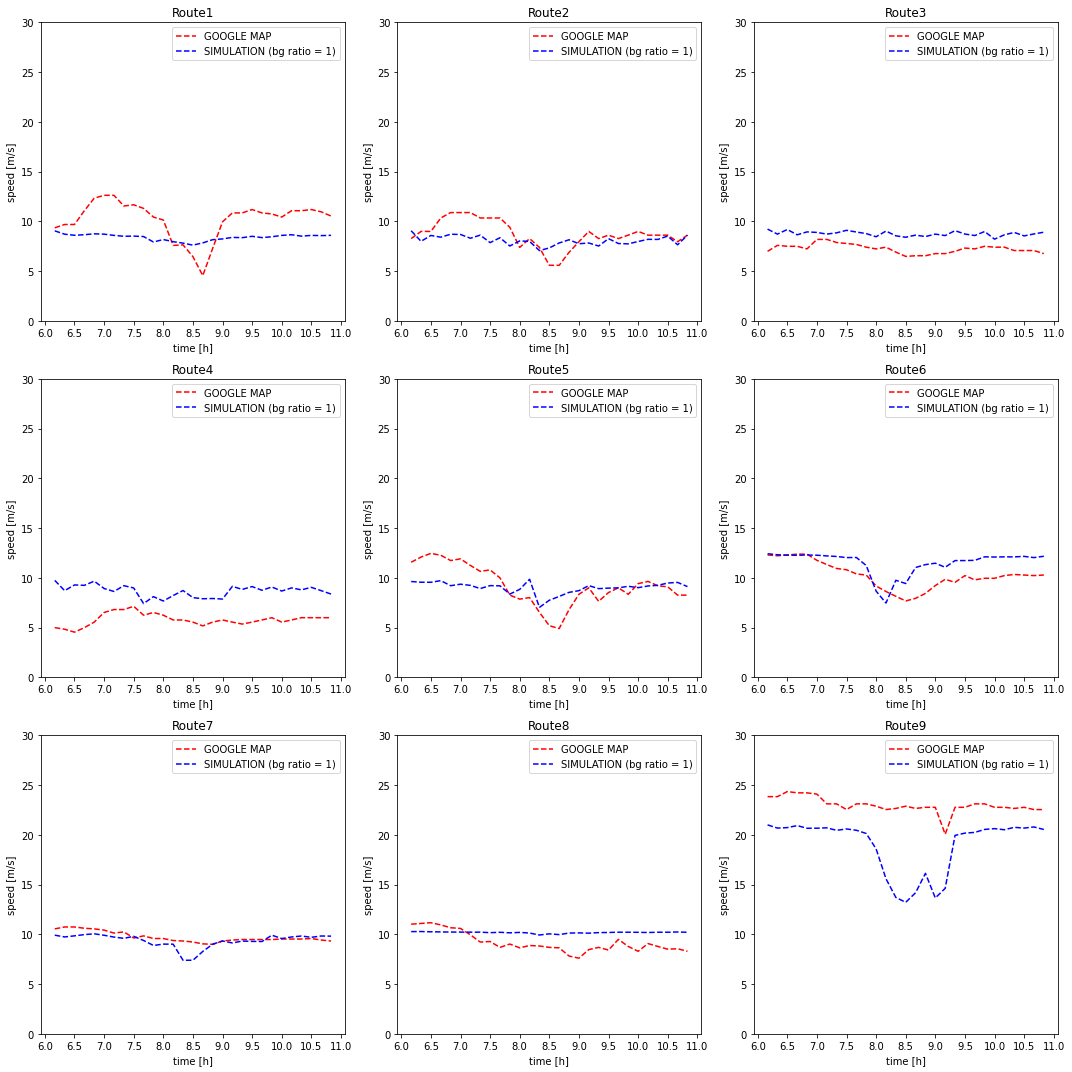

In [19]:
plt.figure(figsize = (15,15))
for i in range(1,10):
    plt.subplot(3,3,i)
    b = a.loc[(a['RouteID'] == 'Route{}'.format(i)) & (a['hour']<=10)].copy()
    b.sort_values(by = ['hour','minute'],inplace = True)
    b['absolute_minute'] = (b['hour']-6)*60 + b['minute']
    plt.plot(b['absolute_minute'], b['average_speed'], 'r--', label = 'GOOGLE MAP')
    plt.plot(b['absolute_minute'], b['average_speed_bg_100'], 'b--', label = 'SIMULATION (bg ratio = 1)')
    if i !=9:
        plt.ylim([0,30])
    else:
        plt.ylim([0,30])
    plt.xlabel('time [h]')
    plt.ylabel('speed [m/s]')
    plt.xticks(np.arange(0, 310,30), np.arange(6,11.1,0.5))
    plt.title('Route{}'.format(i))
    plt.legend()

plt.tight_layout()
plt.savefig('./comparison_average_speed_bg_GOOGLE_change_random_departure_time_1_change_lanes_new.jpg', dpi = 800)

In [9]:
path = '../traffic_inputs/fairfax/background_ods_day_for_Marin_new_change_marin_side_od.csv'
bg_od_df = pd.read_csv(path)

In [10]:
bg_od_df.head()

,origin_nid_old,destin_nid_old,departure_hour,departure_quarter,origin_nid,destin_nid,departure_time
0,10554,4670,8,2,17855,17848,11664
1,2306,9250,7,3,1966,7751,6437
2,1163,5821,8,2,1025,4979,16183
3,7190,4670,9,0,6197,207,16443
4,4670,1886,7,0,17849,1620,7441


In [11]:
bg_od_time_df = pd.DataFrame(columns = ['time', 'count'])
for time in range(0, 19800, 900):
    count = len(bg_od_df.loc[(bg_od_df['departure_time'] < time + 900) & (bg_od_df['departure_time'] >= time)])
    bg_od_time_df = bg_od_time_df.append([{'time':time,'count':count}], ignore_index = True)

([<matplotlib.axis.XTick at 0x1182a2a20>,
 [Text(0, 0, '6.0'),
  Text(1800, 0, '6.5'),
  Text(3600, 0, '7.0'),
  Text(5400, 0, '7.5'),
  Text(7200, 0, '8.0'),
  Text(9000, 0, '8.5'),
  Text(10800, 0, '9.0'),
  Text(12600, 0, '9.5'),
  Text(14400, 0, '10.0'),
  Text(16200, 0, '10.5'),
  Text(18000, 0, '11.0')])

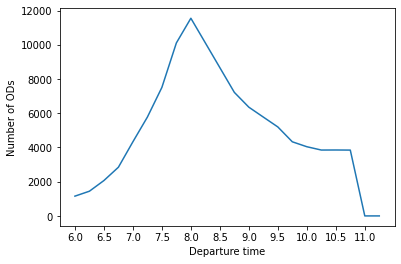

In [12]:
plt.figure()
plt.plot(bg_od_time_df['time'], bg_od_time_df['count'])
plt.xlabel('Departure time')
plt.ylabel('Number of ODs')
plt.xticks(np.arange(0, 19800, 1800), np.arange(0, 19800, 1800)/3600 + 6)

In [ ]:
# 6:00-6:15 1650
# 6:15-6:30 2750
# 6:30-6:45 3850
# 6:45-7:00 4950
# 7:00-7:15 6600
# 7:15-7:30 8800
# 7:30-7:45 12100
# 7:45-8:00 13174
# 8:00-8:15 9350
# 8:15-8:30 6600
# 8:30-8:45 6050
# 8:45-9:00 4950
# 9:00-9:15 4730
# 9:15-9:30 4070
# 9:30-9:45 4070
# 9:45-10:00 4070
# 10:00-10:15 3070
# 10:15-10:30 3070
# 10:30-10:45 3070
# 10:45-11:00 3070

In [ ]:
1650 +2750+3850+4950+6600+8800+12100+13174+9350+6600+6050+4950+4730+4070 * 3 +3070 * 4

In [ ]:
bg_od_time_df

In [ ]:
bg_od_df['departure_time2'] = bg_od_df['departure_time'].copy()
a = bg_od_df.loc[(bg_od_df['departure_time2'] >=0) & (bg_od_df['departure_time2'] < 900)].index.to_list()
selected_a = random.sample(a, 1166)
bg_od_df.loc[selected_a, 'departure_time2'] = bg_od_df.loc[selected_a, 'departure_time2'] + 900

a = bg_od_df.loc[(bg_od_df['departure_time2'] >=900) & (bg_od_df['departure_time2'] < 1800)].index.to_list()
selected_a = random.sample(a, 2380)
bg_od_df.loc[selected_a, 'departure_time2'] = bg_od_df.loc[selected_a, 'departure_time2'] + 900

a = bg_od_df.loc[(bg_od_df['departure_time2'] >=1800) & (bg_od_df['departure_time2'] < 2700)].index.to_list()
selected_a = random.sample(a, 3038)
bg_od_df.loc[selected_a, 'departure_time2'] = bg_od_df.loc[selected_a, 'departure_time2'] + 900

a = bg_od_df.loc[(bg_od_df['departure_time2'] >=2700) & (bg_od_df['departure_time2'] < 3600)].index.to_list()
selected_a = random.sample(a, 2945)
bg_od_df.loc[selected_a, 'departure_time2'] = bg_od_df.loc[selected_a, 'departure_time2'] + 900

a = bg_od_df.loc[(bg_od_df['departure_time2'] >=3600) & (bg_od_df['departure_time2'] < 4500)].index.to_list()
selected_a = random.sample(a, 8189)
bg_od_df.loc[selected_a, 'departure_time2'] = bg_od_df.loc[selected_a, 'departure_time2'] + 900

a = bg_od_df.loc[(bg_od_df['departure_time2'] >=4500) & (bg_od_df['departure_time2'] < 5400)].index.to_list()
selected_a = random.sample(a, 13093)
bg_od_df.loc[selected_a, 'departure_time2'] = bg_od_df.loc[selected_a, 'departure_time2'] + 900

a = bg_od_df.loc[(bg_od_df['departure_time2'] >=5400) & (bg_od_df['departure_time2'] < 6300)].index.to_list()
selected_a = random.sample(a, 16356)
bg_od_df.loc[selected_a, 'departure_time2'] = bg_od_df.loc[selected_a, 'departure_time2'] + 900

a = bg_od_df.loc[(bg_od_df['departure_time2'] >=6300) & (bg_od_df['departure_time2'] < 7200)].index.to_list()
selected_a = random.sample(a, 17013)
bg_od_df.loc[selected_a, 'departure_time2'] = bg_od_df.loc[selected_a, 'departure_time2'] + 900

a = bg_od_df.loc[(bg_od_df['departure_time2'] >=7200) & (bg_od_df['departure_time2'] < 8100)].index.to_list()
selected_a = random.sample(a, 16350)
bg_od_df.loc[selected_a, 'departure_time2'] = bg_od_df.loc[selected_a, 'departure_time2'] + 900

a = bg_od_df.loc[(bg_od_df['departure_time2'] >=8100) & (bg_od_df['departure_time2'] < 9000)].index.to_list()
selected_a = random.sample(a, 17131)
bg_od_df.loc[selected_a, 'departure_time2'] = bg_od_df.loc[selected_a, 'departure_time2'] + 900

a = bg_od_df.loc[(bg_od_df['departure_time2'] >=9000) & (bg_od_df['departure_time2'] < 9900)].index.to_list()
selected_a = random.sample(a, 19411)
bg_od_df.loc[selected_a, 'departure_time2'] = bg_od_df.loc[selected_a, 'departure_time2'] + 900

a = bg_od_df.loc[(bg_od_df['departure_time2'] >=9900) & (bg_od_df['departure_time2'] < 10800)].index.to_list()
selected_a = random.sample(a, 23366)
bg_od_df.loc[selected_a, 'departure_time2'] = bg_od_df.loc[selected_a, 'departure_time2'] + 900

a = bg_od_df.loc[(bg_od_df['departure_time2'] >=10800) & (bg_od_df['departure_time2'] < 11700)].index.to_list()
selected_a = random.sample(a, 21343)
bg_od_df.loc[selected_a, 'departure_time2'] = bg_od_df.loc[selected_a, 'departure_time2'] + 900

a = bg_od_df.loc[(bg_od_df['departure_time2'] >=11700) & (bg_od_df['departure_time2'] < 12600)].index.to_list()
selected_a = random.sample(a, 18715)
bg_od_df.loc[selected_a, 'departure_time2'] = bg_od_df.loc[selected_a, 'departure_time2'] + 900

a = bg_od_df.loc[(bg_od_df['departure_time2'] >=12600) & (bg_od_df['departure_time2'] < 13500)].index.to_list()
selected_a = random.sample(a, 16371)
bg_od_df.loc[selected_a, 'departure_time2'] = bg_od_df.loc[selected_a, 'departure_time2'] + 900

a = bg_od_df.loc[(bg_od_df['departure_time2'] >=13500) & (bg_od_df['departure_time2'] < 14400)].index.to_list()
selected_a = random.sample(a, 14965)
bg_od_df.loc[selected_a, 'departure_time2'] = bg_od_df.loc[selected_a, 'departure_time2'] + 900

a = bg_od_df.loc[(bg_od_df['departure_time2'] >=14400) & (bg_od_df['departure_time2'] < 15300)].index.to_list()
selected_a = random.sample(a, 11378)
bg_od_df.loc[selected_a, 'departure_time2'] = bg_od_df.loc[selected_a, 'departure_time2'] + 900

a = bg_od_df.loc[(bg_od_df['departure_time2'] >=15300) & (bg_od_df['departure_time2'] < 16200)].index.to_list()
selected_a = random.sample(a, 7655)
bg_od_df.loc[selected_a, 'departure_time2'] = bg_od_df.loc[selected_a, 'departure_time2'] + 900

a = bg_od_df.loc[(bg_od_df['departure_time2'] >=16200) & (bg_od_df['departure_time2'] < 17100)].index.to_list()
selected_a = random.sample(a, 3835)
bg_od_df.loc[selected_a, 'departure_time2'] = bg_od_df.loc[selected_a, 'departure_time2'] + 900

bg_od_df.loc[(bg_od_df['departure_time'] >=18000), 'departure_time2'] =  bg_od_df.loc[(bg_od_df['departure_time'] >=18000), 'departure_time2'] - 1800

In [ ]:
bg_od_time_df = pd.DataFrame(columns = ['time', 'count'])
for time in range(0, 19800, 900):
    count = len(bg_od_df.loc[(bg_od_df['departure_time2'] < time + 900) & (bg_od_df['departure_time2'] >= time)])
    bg_od_time_df = bg_od_time_df.append([{'time':time,'count':count}], ignore_index = True)

In [ ]:
bg_od_time_df

In [ ]:
plt.figure()
plt.plot(bg_od_time_df['time'][:-2], bg_od_time_df['count'][:-2])
plt.xlabel('Departure time')
plt.ylabel('Number of ODs')
plt.xticks(np.arange(0, 18000, 1800), np.arange(0, 18000, 1800)/3600 + 6)

In [ ]:
bg_od_df['departure_time'] = bg_od_df['departure_time2'].copy()
bg_od_df = bg_od_df[['origin_nid_old','destin_nid_old','departure_hour','departure_quarter','origin_nid','destin_nid','departure_time']].copy()
bg_od_df.to_csv('./background_ods_day_for_Marin_new_change_marin_side_od.csv', index = False)

In [ ]:
### test 
speed_bg_df_simulation = pd.DataFrame(columns = ['RouteID', 'hour', 'minute', 'average_speed_bg_100']) # speed_bg_df_20
#for t in range(600, 18001, 600):
for t in range(5400, 10801, 600):
    print(t)
    path = './link_enter_leave_onlybg_frac1/link_enter_leave_time_{}.csv'.format(t)
    sim_speed_df = pd.read_csv(path)
    sim_speed_df['current_link'] = sim_speed_df['current_link'].astype('str')
    sim_speed_df['initial_current_link'] = sim_speed_df['current_link'].apply(lambda x: x[0])
    sim_speed_df = sim_speed_df.loc[sim_speed_df['initial_current_link']!= 'v'].copy()
    sim_speed_df['current_link'] = sim_speed_df['current_link'].astype('float').astype('int')
    #sim_speed_df['current_link'] = sim_speed_df['current_link'].apply(lambda x: int(eval(x)) if x[0]!='v' else -1)
    #for route_id in Route_link_dict.keys():
    for route_id in ['Route9']:
        route_link = Route_link_dict.get(route_id)
        sim_speed_df1 = sim_speed_df.loc[sim_speed_df['current_link'].isin(route_link)].copy()
        sim_speed_df1['length'] = sim_speed_df1['current_link'].map(link_length_dict).fillna(0)
        sim_length = sim_speed_df1.groupby('current_link')['length'].mean().sum()
        sim_speed_df1['travel_time'] = sim_speed_df1['current_link_leave_time'] - sim_speed_df1['current_link_enter_time']
        print(sim_speed_df1.groupby('current_link')['travel_time'].mean())
        sim_travel_time = sim_speed_df1.groupby('current_link')['travel_time'].mean().sum()
        average_speed_bg = sim_length / sim_travel_time
        speed_bg_df_simulation = speed_bg_df_simulation.append([{'RouteID':route_id, 'hour':int(t//3600)+6, 'minute': (t%3600)/60,
                                           'average_speed_bg_100':average_speed_bg}], ignore_index = True)
        